# Desafio Análise Bivariada

### Nome: Renata Pereira

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, chi2_contingency, ttest_ind, f_oneway

In [2]:
# Importando o arquivo

df = pd.read_csv('/Users/renat/Desktop/Coderhouse/20. Analise Bivariada e Multivariada-20240903T184634Z-001/20. Analise Bivariada e Multivariada/Aula 20 - Análise Multivariada/desafios/supermarket_sales.csv')

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
df.shape

(1000, 17)

In [6]:
df.count()

Invoice ID                 1000
Branch                     1000
City                       1000
Customer type              1000
Gender                     1000
Product line               1000
Unit price                 1000
Quantity                   1000
Tax 5%                     1000
Total                      1000
Date                       1000
Time                       1000
Payment                    1000
cogs                       1000
gross margin percentage    1000
gross income               1000
Rating                     1000
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,2.649463e+01,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431e+00,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,2.458853e+02,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,2.341765e+02,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,6.131498e-14,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580e+00,4.000000,5.500000,7.000000,8.500000,10.000000


### Análise de Correlação:

Correlação de Pearson: -0.04
Correlação de Spearman: -0.02


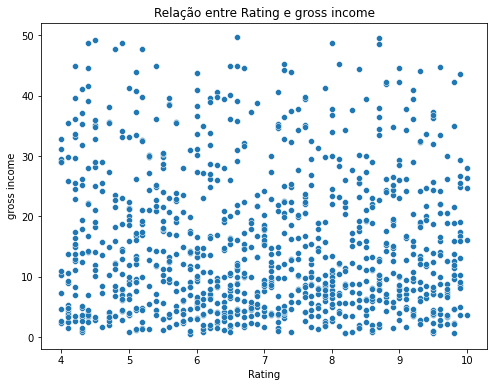

In [8]:
# Correlação de Pearson entre 'Rating' e 'gross income'
pearson_corr, _ = pearsonr(df['Rating'], df['gross income'])
print(f"Correlação de Pearson: {pearson_corr:.2f}")

# Correlação de Spearman entre  'Rating' e 'gross income'
spearman_corr, _ = spearmanr(df['Rating'], df['gross income'])
print(f"Correlação de Spearman: {spearman_corr:.2f}")

# Visualização: Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df,x='Rating', y='gross income')
plt.title('Relação entre Rating e gross income')
plt.show()

Vemos que as variáveis Rating e Receita bruta não se relacionam.

<AxesSubplot:xlabel='Branch', ylabel='gross income'>

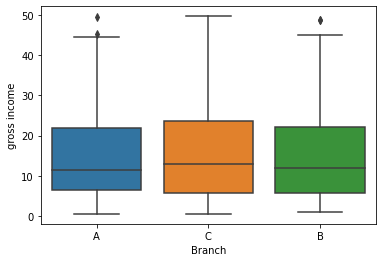

In [9]:
sns.boxplot(x=df['Branch'], y=df['gross income'])

Em média não há muita diferença na receita bruta por setor. O setor C tem receitas ligeiramente superiores as de A ou B.

<AxesSubplot:xlabel='Gender', ylabel='gross income'>

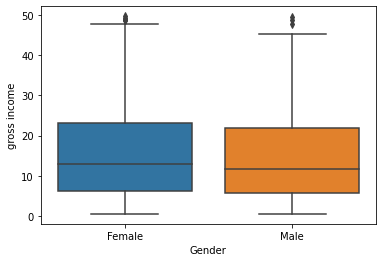

In [10]:
sns.boxplot(x=df['Gender'], y=df['gross income'])

O rendimento bruto é semelhante tanto para homens como para mulheres, embora as clientes do sexo feminino gastem um pouco mais no percentil 75.

<AxesSubplot:xlabel='Product line', ylabel='gross income'>

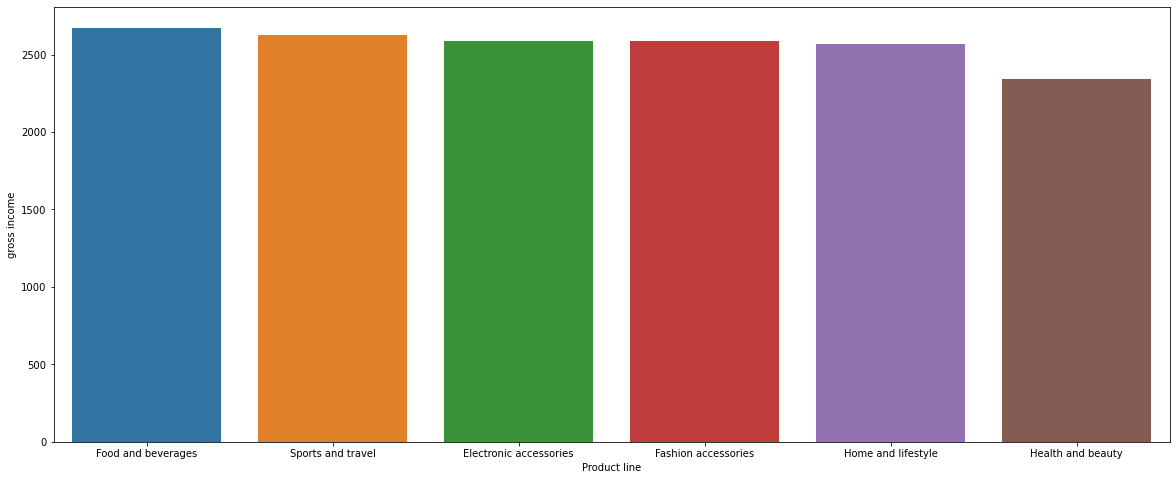

In [11]:
cat = df[["Product line", "gross income"]].groupby(['Product line'], as_index=False).sum().sort_values(by='gross income', ascending=False)

plt.figure(figsize=(20,8))

sns.barplot(x='Product line', y='gross income', data=cat)